<a href="https://colab.research.google.com/github/priyanshgupta1998/Image_Processing/blob/master/Multilabel_classification/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Multi-label image classification model
`predict the different genres just by looking at the poster`

`Multi-Label Image Classification is different from Multi-Class Image Classification`

`When we can classify an image into more than one class (as in the image above) or any image that has more than one class ,it is known as a multi-label image classification problem.`

`We propose to achieve movie genre classification based only on movie poster images. A deep neural network is constructed to jointly describe visual appearance and object information, and classify a given movie poster image into genres. Because a movie may belong to multiple genres, this is a multi-label image classification problem. To facilitate related studies, we collect a large-scale movie poster dataset, associated with various metadata. Based on this dataset, we fine-tune a pretrained convolutional neural network to extract visual representation, and adopt a state-of-the-art framework to detect objects in posters. `

#Understanding the Multi-Label Image Classification Model Architecture
`Now, the pre-processing steps for a multi-label image classification task will be similar to that of a multi-class problem. The key difference is in the step where we define the model architecture.`

`We use a softmax activation function in the output layer for a multi-class image classification model. For each image, we want to maximize the probability for a single class. As the probability of one class increases, the probability of the other class decreases. So, we can say that the probability of each class is dependent on the other classes.`

`But in case of multi-label image classification, we can have more than one label for a single image. We want the probabilities to be independent of each other. Using the softmax activation function will not be appropriate. Instead, we can use the sigmoid activation function. This will predict the probability for each class independently. It will internally create n models (n here is the total number of classes), one for each class and predict the probability for each class.`

`Using sigmoid activation function will turn the multi-label problem to n – binary classification problems. So for each image, we will get probabilities defining whether the image belongs to class 1 or not, and so on. Since we have converted it into a n – binary classification problem, we will use the binary_crossentropy loss. Our aim is to minimize this loss in order to improve the performance of the model.`

`Our aim is to predict the genre of a movie using just its poster image. Can you guess why it is a multi-label image classification problem? Think about it for a moment before you look below.A movie can belong to more than one genre, right? It doesn’t just have to belong to one category, like action or comedy. The movie can be a combination of two or more genres. Hence, multi-label image classification.`

#get the dataset from here https://www.cs.ccu.edu.tw/~wtchu/projects/MoviePoster/index.html

In [62]:
!wget https://www.cs.ccu.edu.tw/~wtchu/projects/MoviePoster/Movie_Poster_Dataset.zip

--2019-10-21 13:44:20--  https://www.cs.ccu.edu.tw/~wtchu/projects/MoviePoster/Movie_Poster_Dataset.zip
Resolving www.cs.ccu.edu.tw (www.cs.ccu.edu.tw)... 140.123.101.3
Connecting to www.cs.ccu.edu.tw (www.cs.ccu.edu.tw)|140.123.101.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 264902968 (253M) [application/zip]
Saving to: ‘Movie_Poster_Dataset.zip.1’

Movie_Poster_Datase 100%[===================>] 252.63M  11.2MB/s    in 24s     

2019-10-21 13:44:46 (10.4 MB/s) - ‘Movie_Poster_Dataset.zip.1’ saved [264902968/264902968]



In [2]:
!wget https://www.cs.ccu.edu.tw/~wtchu/projects/MoviePoster/Movie_Poster_Metadata.zip

--2019-10-21 10:05:23--  https://www.cs.ccu.edu.tw/~wtchu/projects/MoviePoster/Movie_Poster_Metadata.zip
Resolving www.cs.ccu.edu.tw (www.cs.ccu.edu.tw)... 140.123.101.3
Connecting to www.cs.ccu.edu.tw (www.cs.ccu.edu.tw)|140.123.101.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1529967 (1.5M) [application/zip]
Saving to: ‘Movie_Poster_Metadata.zip’

Movie_Poster_Metada 100%[===================>]   1.46M   954KB/s    in 1.6s    

2019-10-21 10:05:26 (954 KB/s) - ‘Movie_Poster_Metadata.zip’ saved [1529967/1529967]



`This dataset was collected from the IMDB website. One poster image was collected from one (mostly) Hollywood movie released from 1980 to 2015. Each poster image is associated with a movie as well as some metadata like ID, genres, and box office. The ID of each image is set as its file name.`

In [0]:
!unzip Movie_Poster_Dataset.zip

In [0]:
!unzip Movie_Poster_Metadata.zip

In [1]:
# We've taken iamges from 1980 to 2015 ---> 36 images
import os
path = '/content/Movie_Poster_Dataset/'
folders = os.listdir(path)

print('Total Number of folders of movies based on year : ' , len(folders))

Total Number of folders of movies based on year :  36


In [6]:
image_set = []
movie_set = {}
for year in folders:
  liss = os.listdir(path + year + '/')
  for i in liss:
    image_set+=[path + year + '/' +i]
  movie_set[year] = len(liss)
  
print(len(movie_set))
print(movie_set)

36
{'1980': 96, '2002': 249, '1999': 226, '2005': 282, '2006': 327, '1997': 204, '2013': 387, '2008': 318, '2015': 343, '1990': 167, '1983': 114, '1987': 187, '2009': 284, '1981': 89, '1991': 171, '1988': 201, '2004': 295, '1992': 175, '2014': 350, '1996': 210, '1982': 0, '2010': 273, '1984': 134, '2003': 247, '2001': 213, '2012': 351, '2011': 311, '2000': 237, '1985': 150, '1998': 204, '1993': 192, '1994': 191, '1989': 180, '2007': 319, '1995': 206, '1986': 169}


In [7]:
#Now calculate the Total number of images 
l=0
for k,v in movie_set.items():
  l+=v
print("TOtal Number of Images in the folder from 1980 to 2015 : " , l)

TOtal Number of Images in the folder from 1980 to 2015 :  8052


In [8]:
print(len(image_set))
image_set[:5]

8052


['/content/Movie_Poster_Dataset/1980/tt0080453.jpg',
 '/content/Movie_Poster_Dataset/1980/tt0080731.jpg',
 '/content/Movie_Poster_Dataset/1980/tt0081534.jpg',
 '/content/Movie_Poster_Dataset/1980/tt0081184.jpg',
 '/content/Movie_Poster_Dataset/1980/tt0080472.jpg']

#Use Machine learning library skimage to visualize the image

(450, 300, 3)


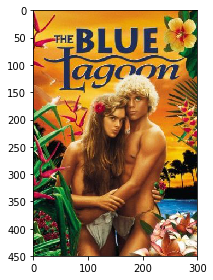

In [64]:
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
%matplotlib inline
image_org = imread(image_set[0])
print(image_org.shape)
imshow(image_org)

#Now we will create another folder and save all the image in same folder together for easy access

In [0]:
!mkdir Images    

In [0]:
from PIL import Image  
import PIL  
#Save all the images in anothr folder 
for i in image_set:
  im1 = Image.open(i)  
  im1 = im1.save("/content/Images/" +i.split('Dataset/')[1].split('/')[0] + '_' +i.split('Dataset/')[1].split('/')[1] ) 

In [65]:
#Check the Image folder now 
container = os.listdir("/content/Images/")
print(len(container))
container[:5]

8052


['1998_tt0120791.jpg',
 '2007_tt0498353.jpg',
 '2015_tt4696222.jpg',
 '1994_tt0110442.jpg',
 '2006_tt0481574.jpg']

In [66]:
#Check whether all the image different or same
print(len(set(container)))

8052


(451, 300, 3)


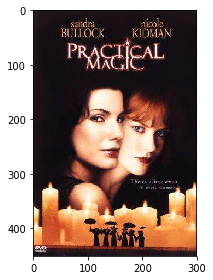

In [67]:
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
%matplotlib inline
image_org = imread("/content/Images/" + container[0])
print(image_org.shape)
imshow(image_org)

#Importing all the necessary libraries

In [68]:

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

Using TensorFlow backend.


In [69]:
meta_data_fold = os.listdir('/content/groundtruth/')
print(len(meta_data_fold))
meta_data_fold[0] , meta_data_fold[1]

36


('1996.txt', '2012.txt')

https://stackoverflow.com/a/58405718/8950300

#Create the dataset by extracting iformation from the text files 

In [214]:
column = ['id','release','rating','imdbID','imdbVotes','genre','title','writers', 'actors','types','box_money','time','lang','country','awards','meta_score', 'director','rated']  

import pandas as pd
data = pd.DataFrame(columns = column)
data

,id,release,rating,imdbID,imdbVotes,genre,title,writers,actors,types,box_money,time,lang,country,awards,meta_score,director,rated


In [0]:

for jk in range(36):
  file = '/content/groundtruth/' +meta_data_fold[jk]
  file1 = open(file,"rb")  
  st = file1.read()
  st.decode('UTF-16')
  import re
  import ast
  strim = st.decode('UTF-16')
  strim = re.sub('\r\n}' , '}' ,strim )
  strim = re.sub('{\r\n  ' , '{' ,strim )
  strim = re.sub(',\r\n  ' , '|' ,strim )
  strim = re.sub('\r\n' , '|' ,strim )
  strim = strim.strip('\r\n')
  strim = re.sub('{' , '' ,strim )
  strim = re.sub('}' , '' ,strim )
  # print(strim)
  liss = strim.split('|')
  # print("Old length : " , len(liss))
  del liss[-1]
  # print("New length : " , len(liss))
  l = len(liss)
  # print(len(liss)//20)
  # print(liss)
  count = 0
  id = []
  release = []
  rating = []
  imdbID = []
  imdbVotes = []
  genre = []
  title = []
  writers = []
  actors = []
  types = []
  box_money = []
  time = []
  lang = []
  country = []
  awards = []
  meta_score = []
  director = []
  rated = []

  for i in range(0,l , 20):
    count+=1
  #   print(count, ast.literal_eval((liss[i].split(':')[0].strip())) , liss[i].split(':')[1].strip())
    id.append(liss[i].split(':')[1].strip().split('ObjectId("56fbcde771a0651bcc')[1].split('")')[0])


  for i in range(1,l , 20):
    count+=1
  #   print(count, ast.literal_eval((liss[i].split(':')[0].strip())) , ast.literal_eval(liss[i].split(':')[1].strip()))
    if(ast.literal_eval(liss[i].split(':')[1].strip())!='N/A'):
      release.append('-'.join(ast.literal_eval(liss[i].split(':')[1].strip()).split(' ')))
    else:
      release.append('-')


  for i in range(2,l , 20):
    count+=1
  #   print(count, ast.literal_eval((liss[i].split(':')[0].strip())) , ast.literal_eval(liss[i].split(':')[1].strip()))
    if(ast.literal_eval(liss[i].split(':')[1].strip())!='N/A'):
      rating.append(float(ast.literal_eval(liss[i].split(':')[1].strip())))
    else:
      rating.append(0.0)



  for i in range(3,l , 20):
    count+=1
  #   print(count, ast.literal_eval((liss[i].split(':')[0].strip())) , ast.literal_eval(liss[i].split(':')[1].strip()))
    imdbID.append(ast.literal_eval(liss[i].split(':')[1].strip()))


  for i in range(4,l , 20):
    count+=1
  #   print(count, ast.literal_eval((liss[i].split(':')[0].strip())) , ast.literal_eval(liss[i].split(':')[1].strip()))
    if( ast.literal_eval(liss[i].split(':')[1].strip())!= 'N/A'):
      imdbVotes.append(ast.literal_eval(liss[i].split(':')[1].strip()))
    else:
      imdbVotes.append(0)


  for i in range(5,l , 20):
    count+=1
  #   print(count, ast.literal_eval((liss[i].split(':')[0].strip())) , ast.literal_eval(liss[i].split(':')[1].strip()))
    hal = [j.strip() for j in ast.literal_eval(liss[i].split(':')[1].strip()).split(',')]
    genre.append('/'.join(hal))




  for i in range(6,l , 20):
    count+=1
  #   print(count, ast.literal_eval((liss[i].split(':')[0].strip())) , ast.literal_eval(liss[i].split(':')[1].strip()))
    try:
      title.append(ast.literal_eval(liss[i].split(':')[1].strip()))
    except:
      title.append(liss[i].split(':')[1].strip().split('"')[1])




  for i in range(7,l , 20):
    count+=1
    #print(count, ast.literal_eval((liss[i].split(':')[0].strip())) , ast.literal_eval(liss[i].split(':')[1].strip()))
    writers.append(ast.literal_eval(liss[i].split(':')[1].strip()).split(','))


  for i in range(8,l , 20):
    count+=1
    #print(count, ast.literal_eval((liss[i].split(':')[0].strip())) , ast.literal_eval(liss[i].split(':')[1].strip()))
    actors.append(ast.literal_eval(liss[i].split(':')[1].strip()))


  for i in range(9,l , 20):
    count+=1
    #print(count, ast.literal_eval((liss[i].split(':')[0].strip())) , ast.literal_eval(liss[i].split(':')[1].strip()))
    types.append(ast.literal_eval(liss[i].split(':')[1].strip()))



  for i in range(10,l , 20):
    count+=1
    #print(count, ast.literal_eval((liss[i].split(':')[0].strip())) , ast.literal_eval(liss[i].split(':')[1].strip()))
    lang.append(ast.literal_eval(liss[i].split(':')[1].strip()).split())

  for i in range(12,l , 20):
    count+=1
    #print(count, ast.literal_eval((liss[i].split(':')[0].strip())) , ast.literal_eval(liss[i].split(':')[1].strip()))
    time.append('-'.join(ast.literal_eval(liss[i].split(':')[1].strip()).split()))



  for i in range(13,l , 20):
    count+=1
    #print(count, ast.literal_eval((liss[i].split(':')[0].strip())) , ast.literal_eval(liss[i].split(':')[1].strip()))
    if(liss[i].split(':')[1].strip()!='null'):
      box_money.append(int(''.join(ast.literal_eval(liss[i].split(':')[1].strip()).split(','))))
    else:
      box_money.append(0)


  for i in range(14,l , 20):
    count+=1
    #print(count, ast.literal_eval((liss[i].split(':')[0].strip())) , ast.literal_eval(liss[i].split(':')[1].strip()))
    country.append('/'.join(ast.literal_eval(liss[i].split(':')[1].strip()).split(',')))


  for i in range(15,l , 20):
    count+=1
    #print(count, ast.literal_eval((liss[i].split(':')[0].strip())) , ast.literal_eval(liss[i].split(':')[1].strip()))
    if(ast.literal_eval(liss[i].split(':')[1].strip())!='N/A'):
      awards.append(ast.literal_eval(liss[i].split(':')[1].strip()))
    else:
      awards.append('None')



  for i in range(16,l , 20):
    count+=1
    #print(count, ast.literal_eval((liss[i].split(':')[0].strip())) , ast.literal_eval(liss[i].split(':')[1].strip()))
    if(ast.literal_eval(liss[i].split(':')[1].strip())!='N/A'):
      meta_score.append(ast.literal_eval(liss[i].split(':')[1].strip()))
    else:
      meta_score.append(0)



  for i in range(17,l , 20):
    count+=1
    #print(count, ast.literal_eval((liss[i].split(':')[0].strip())) , ast.literal_eval(liss[i].split(':')[1].strip()))

    if(ast.literal_eval(liss[i].split(':')[1].strip())!='N/A'):
      director.append(ast.literal_eval(liss[i].split(':')[1].strip()))
    else:
      director.append('-')



  for i in range(18,l , 20):
    count+=1
    #print(count, ast.literal_eval((liss[i].split(':')[0].strip())) , ast.literal_eval(liss[i].split(':')[1].strip()))

    if(ast.literal_eval(liss[i].split(':')[1].strip())!='N/A'):
      rated.append(ast.literal_eval(liss[i].split(':')[1].strip()))
    else:
      rated.append('-')

  df = pd.DataFrame()
  df['id'] = id
  df['release'] = release
  df['rating'] = rating
  df['imdbID'] = imdbID
  df['imdbVotes'] = imdbVotes
  df['genre'] = genre
  df['title'] = title 
  df['writers'] = writers
  df['actors'] = actors
  df['types'] = types
  df['box_money'] = box_money
  df['time'] = time
  df['lang'] = lang
  df['country'] = country 
  df['awards'] =awards
  df['meta_score'] = meta_score 
  df['director'] = director
  df['rated'] = rated
  data = pd.concat([data, df], ignore_index=True)
  
  
  
print(data.shape)
data.head()

#Now we are gonna mount pre structured dataset here from the google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!unzip '/content/drive/My Drive/Multi_Label_dataset.zip'

In [3]:
import os
driv = os.listdir('/content/Multi_Label_dataset/')
driv   #here we have another folder inside the 'Multi_Label_dataset' folder 

['train.csv', 'Images']

## This data set file is generated from the poster meta data

In [5]:
import pandas as pd
train = pd.read_csv('/content/Multi_Label_dataset/'  + driv[0])    # reading the csv file
print(train.shape)
train.head()    

(7254, 27)


,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


`Here we have more than one genre for a movie.`

In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

Using TensorFlow backend.


In [8]:
train_image = []
for i in tqdm(range(2000)):
    img = image.load_img('/content/Multi_Label_dataset/'  + driv[1] + '/'+train['Id'][i]+'.jpg',target_size=(400,400,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 2000/2000 [00:08<00:00, 234.42it/s]


In [9]:
X.shape

(2000, 400, 400, 3)

['Comedy']


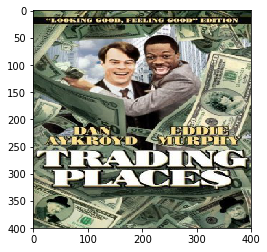

In [10]:
print(train['Genre'][2])
plt.imshow(X[2])

`We will remove the Id and genre columns from the train file and convert the remaining columns to an array which will be the target for our images:`

In [11]:
y = np.array(train[:2000].drop(['Id', 'Genre'],axis=1))
y.shape

(2000, 25)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

`The next step is to define the architecture of our model. The output layer will have 25 neurons (equal to the number of genres) and we’ll use sigmoid as the activation function.`

In [13]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(400,400,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))



model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))



model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())    #convert multidimensional to one dimensional


model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(25, activation='sigmoid'))  #output layer






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 396, 396, 16)      1216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 198, 198, 16)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 198, 198, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 194, 194, 32)      12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 97, 97, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 97, 97, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 93, 93, 64)       

In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [16]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)




Train on 1800 samples, validate on 200 samples
Epoch 1/10





1800/1800 [==============================] - 26s 14ms/step - loss: 0.5299 - acc: 0.7511 - val_loss: 0.4636 - val_acc: 0.8992
Epoch 2/10
1800/1800 [==============================] - 14s 8ms/step - loss: 0.3511 - acc: 0.8676 - val_loss: 0.3145 - val_acc: 0.9076
Epoch 3/10
1800/1800 [==============================] - 14s 8ms/step - loss: 0.3075 - acc: 0.8891 - val_loss: 0.2684 - val_acc: 0.9064
Epoch 4/10
1800/1800 [==============================] - 14s 8ms/step - loss: 0.2864 - acc: 0.8990 - val_loss: 0.2566 - val_acc: 0.9076
Epoch 5/10
1800/1800 [==============================] - 14s 8ms/step - loss: 0.2770 - acc: 0.8998 - val_loss: 0.2508 - val_acc: 0.9076
Epoch 6/10
1800/1800 [==============================] - 14s 8ms/step - loss: 0.2710 - acc: 0.9016 - val_loss: 0.2426 - val_acc: 0.9076
Epoch 7/10
1800/1800 [==============================] - 14s 8ms/step - loss: 0.2691 - acc: 0.9018 - val_loss: 0.2458 - val_acc: 0.9076

# check model's performance on unseen images 

In [0]:
img = image.load_img('GOT.jpg',target_size=(400,400,3))
img = image.img_to_array(img)
img = img/255

`Now, we will predict the genre for these posters using our trained model. The model will tell us the probability for each genre and we will take the top 3 predictions from that.`

`we will make predictions for the GOT & AVENGERS posters`

In [23]:
classes = np.array(train[:2000].columns[2:])
proba = model.predict(img.reshape(1,400,400,3))
proba

array([[0.2242389 , 0.13889566, 0.02680326, 0.05834082, 0.4426236 ,
        0.226587  , 0.02520368, 0.50447714, 0.0749456 , 0.08652881,
        0.03275001, 0.11111835, 0.06553251, 0.02138418, 0.07587513,
        0.00565073, 0.01243746, 0.01036334, 0.19635803, 0.0831717 ,
        0.01062107, 0.04211619, 0.15531573, 0.02230355, 0.01453624]],
      dtype=float32)

In [27]:
np.argsort(proba[0])

array([15, 17, 20, 16, 24, 13, 23,  6,  2, 10, 21,  3, 12,  8, 14, 19,  9,
       11,  1, 22, 18,  0,  5,  4,  7])

In [28]:
top_3 = np.argsort(proba[0])[:-4:-1]
top_3

array([7, 4, 5])

Drama (0.503)
Comedy (0.439)
Crime (0.233)


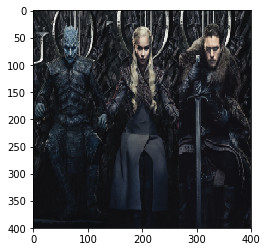

In [18]:
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

`Impressive! Our model suggests Drama, Thriller and Action genres for Game of Thrones. That classifies GoT pretty well. Let’s try our model on the Avengers poster. Preprocess the image:`

In [0]:
img = image.load_img('avengers.jpeg',target_size=(400,400,3))
img = image.img_to_array(img)
img = img/255

In [39]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,400,400,3))
print(np.argsort(proba[0]))
top_3 = np.argsort(proba[0])[:-4:-1]
top_3

[15 17 20 16 24 13 23  6  2 10 21  3 12  8 14 19  9 11  1 22 18  0  5  4
  7]


array([7, 4, 5])

Drama (0.503)
Comedy (0.44)
Crime (0.229)


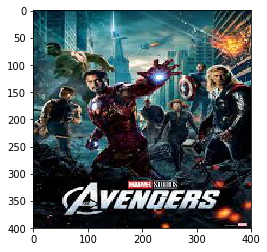

In [33]:
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

`The genres our model comes up with are Drama, Action and Thriller. Again, these are pretty accurate results. Can the model perform equally well for Bollywood movies ? Let’s find out. We will use this Golmal 3 poster.`

In [0]:
img = image.load_img('golmal.jpeg',target_size=(400,400,3))
img = image.img_to_array(img)
img = img/255

In [37]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,400,400,3))

print(np.argsort(proba[0]))
top_3 = np.argsort(proba[0])[:-4:-1]
top_3

[15 17 20 16 24 13 23  6  2 10 21  3 12  8 14 19  9 11  1 22 18  0  5  4
  7]


array([7, 4, 5])

Drama (0.504)
Comedy (0.443)
Crime (0.227)


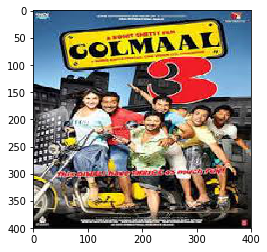

In [38]:

for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

`Success ! Golmaal 3 was a comedy and our model has predicted it as the topmost genre. The other predicted genres are Drama and Romance – a relatively accurate assessment. We can see that the model is able to predict the genres just by seeing their poster.`

`we should make the dataset in such a way that all the genre categories will have comparatively equal distribution. because if a certain genre is repeating in most of the training images, our model might overfit on that genre. And for every new image, the model might predict the same genre. To overcome this problem, you should try to have an equal distribution of genre categories.`

#others 

#how to decode byte 0xff in python
` as we know this hexadecimal encoding so , utf-8 , codec and other decoders are not able to decode this byte string`    

 `here we will use 'UTF-16'  or 'utf-16' encoding to decode the oxff byte array`

In [0]:
k ="this world is very beautiful"
k.encode('utf-16')

b'\xff\xfet\x00h\x00i\x00s\x00 \x00w\x00o\x00r\x00l\x00d\x00 \x00i\x00s\x00 \x00v\x00e\x00r\x00y\x00 \x00b\x00e\x00a\x00u\x00t\x00i\x00f\x00u\x00l\x00'

In [0]:
k = b'\xff\xfet\x00h\x00i\x00s\x00 \x00w\x00o\x00r\x00l\x00d\x00 \x00i\x00s\x00 \x00v\x00e\x00r\x00y\x00 \x00b\x00e\x00a\x00u\x00t\x00i\x00f\x00u\x00l\x00'
k.decode('utf-16')

In [0]:
k = b'\xff\xfe{\x00\r\x00\n\x00 \x00 \x00"\x00_\x00i\x00d\x00'
print(str(k, "utf-16"))
print(k.decode('UTF-16'))

{
  "_id
{
  "_id
